### Types Of Transformation

- Normalization And Standardization
- Scaling to Minimum And Maximum values
- Scaling To Median And Quantiles
- Guassian Transformation
- Logarithmic Transformation
- Reciprocal Transformation
- Square Root Transformation Exponential Transformation
- Box Cox Transformation

### Standardization
#### We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
%matplotlib inline

In [2]:
df=pd.read_csv('Datasets/titanic_train.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [4]:
df['Age'].fillna(df.Age.median(), inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [5]:
### Using StandardScalar from sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
sc

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
#### Fit V/S Fir_transform
df_scaled = sc.fit_transform(df)
df_scaled[0]

array([-0.78927234,  0.82737724, -0.56573646, -0.50244517])

In [7]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns)
df_scaled.head()

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


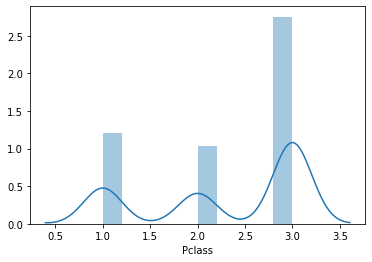

In [8]:
sns.distplot(df.Pclass, bins=10)

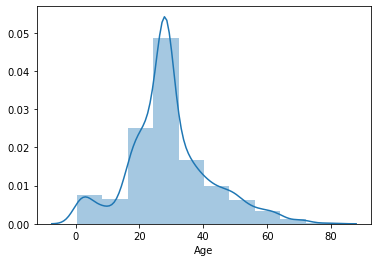

In [9]:
sns.distplot(df.Age, bins=10)

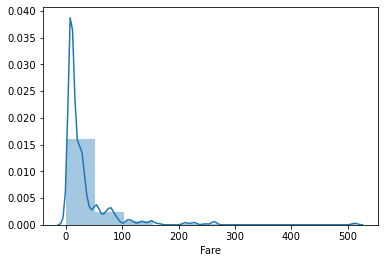

In [10]:
sns.distplot(df.Fare, bins=10)

### Min-Max Scaling
#### it scales the value from 0 and 1.

__Formula__: X_scaled = (X - X.min / (X.max - X.min))

In [11]:
mm = MinMaxScaler(feature_range=(0, 1))
mm

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
df_min_max_scaled = pd.DataFrame(mm.fit_transform(df), columns=df.columns)
df_min_max_scaled.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


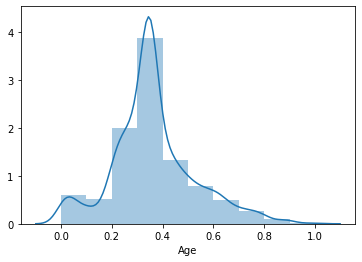

In [13]:
sns.distplot(df_min_max_scaled.Age, bins=10)

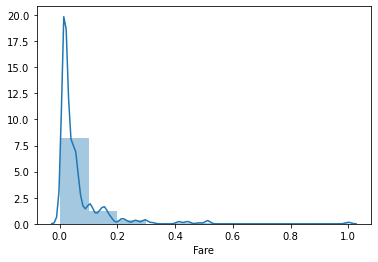

In [14]:
sns.distplot(df_min_max_scaled.Fare, bins=10)

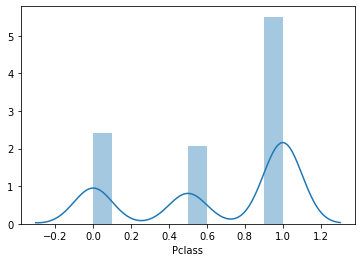

In [15]:
sns.distplot(df_min_max_scaled.Pclass, bins=10)

### Robust Scaler

It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:
IQR = 75th quantile - 25th quantile

#### X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 1-10 precentile---10% of all values in this group is less than 1 4-40%

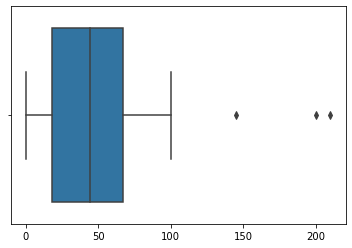

In [16]:
lst = pd.Series([0, 10, 20, 34,56,3,56,22,56,34,67,89,4,67,33,5,45,67,33,67,12,200, 210,145, 23,45,44,56,8,40,4,11,56,78,89,100])
sns.boxplot(lst)
plt.show()

In [17]:
from sklearn.preprocessing import RobustScaler
sc = RobustScaler()
sc

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
             with_scaling=True)

In [18]:
df_scaled = pd.DataFrame(sc.fit_transform(df), columns=df.columns)
df_scaled.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


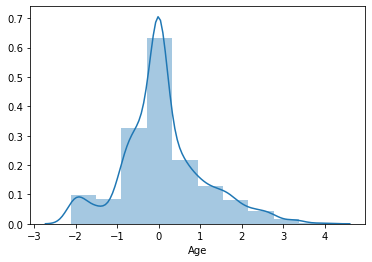

In [19]:
sns.distplot(df_scaled.Age, bins=10)

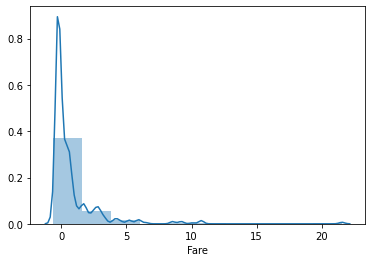

In [20]:
sns.distplot(df_scaled.Fare, bins=10)

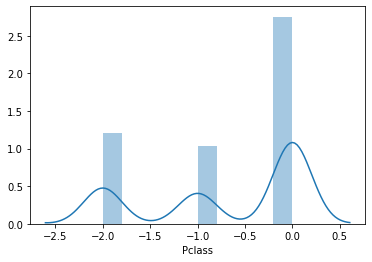

In [21]:
sns.distplot(df_scaled.Pclass, bins=10)

### Gaussian Transformation

- Logarithmic Transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

Some Machine Learning algo like linear regression and logistic reg. assumes that they are normally distributed and gives good performance & accuracy.

In [22]:
df=pd.read_csv('Datasets/titanic_train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [23]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [24]:
### Fillna
df["Age"] = df.Age.fillna(df.Age.median())
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [25]:
import scipy.stats as stat
import pylab

In [26]:
#### If you want to check whether feature is guassian or normal distributed
#### Q-Q plot

def plot_data(df, feature):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

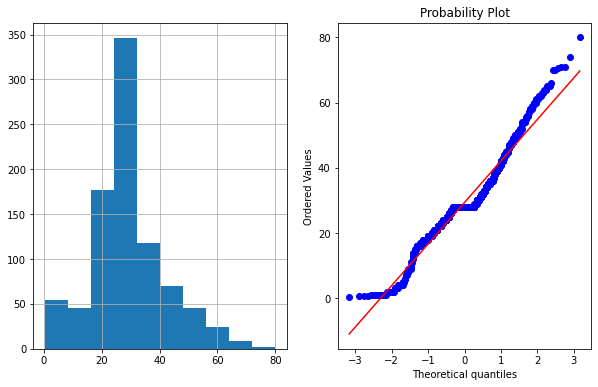

In [27]:
plot_data(df, 'Age')

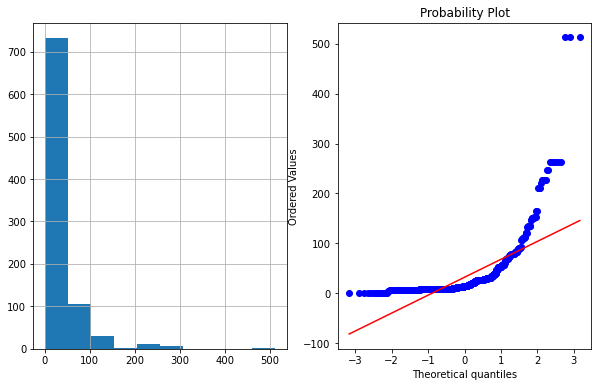

In [28]:
plot_data(df,'Fare')

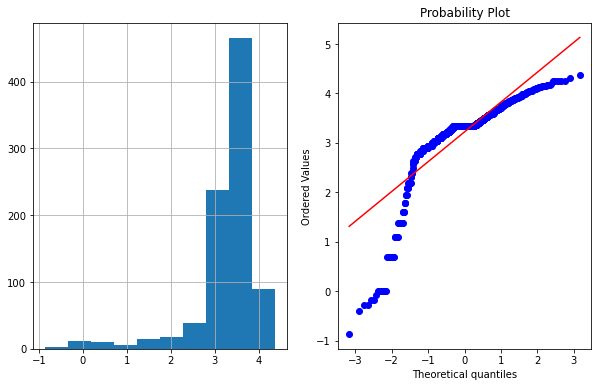

In [29]:
#### Logarithmic Transformation
df["Age_log"] = np.log(df['Age'])
plot_data(df, 'Age_log')

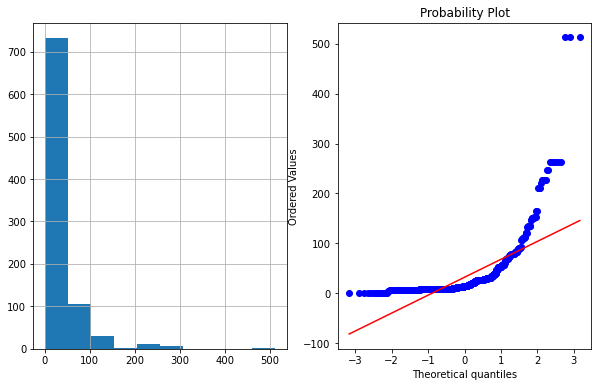

In [30]:
plot_data(df,'Fare')

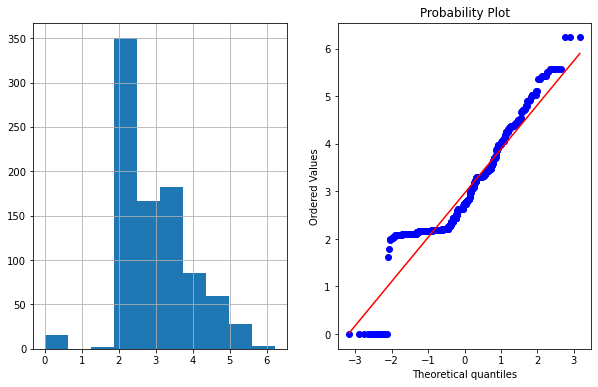

In [31]:
#### Fare
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

### Reciprocal transformation
1/df['variable']

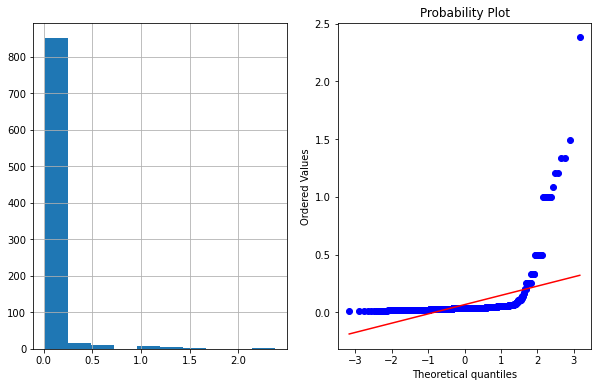

In [32]:
df['Age_res']=1./df['Age']
plot_data(df, "Age_res")

### Square-Root Transformation

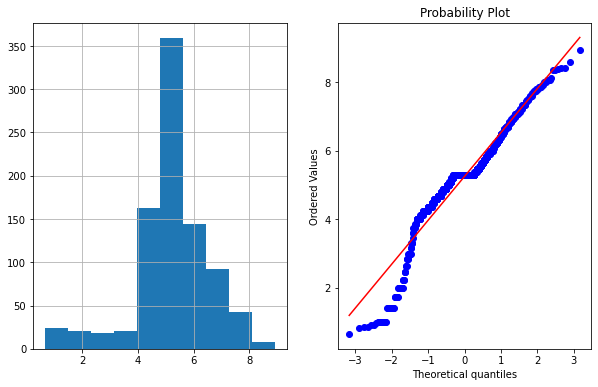

In [33]:
df['Age_sqrt'] = np.sqrt(df["Age"])
plot_data(df, "Age_sqrt")

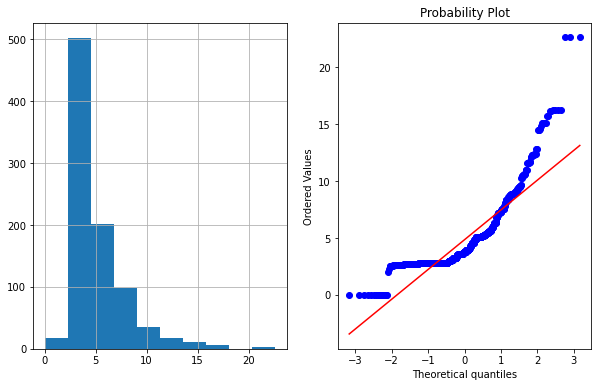

In [34]:
df['Fare_sqrt']=np.sqrt(df['Fare'])
plot_data(df, "Fare_sqrt")

### Exponential Transformation

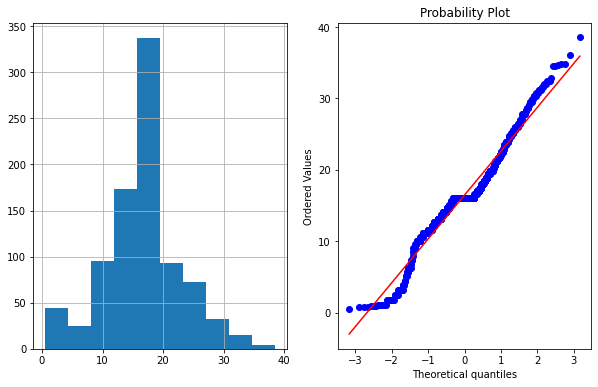

In [35]:
df["Age_exp"] = df.Age**(1/1.2)
plot_data(df, "Age_exp")

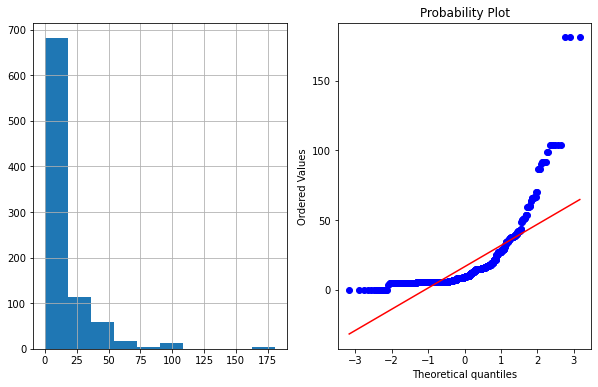

In [36]:
df['Fare_exp']=df['Fare']**(1/1.2)
plot_data(df, "Fare_exp")

### BoxCox Tranformation

The Box-Cox transformation is defined as:

__T(Y)=(Y exp(λ)−1)/λ__

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

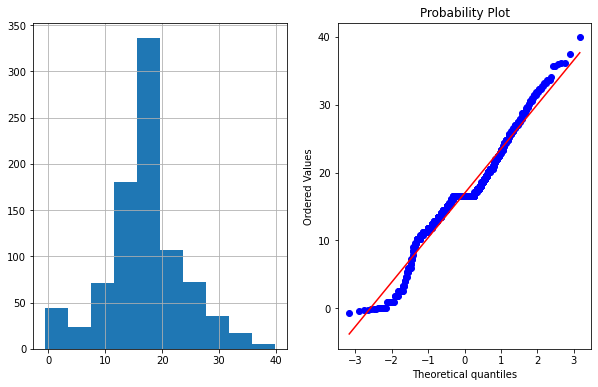

In [37]:
df['Age_boxcox'], parameters = stat.boxcox(df.Age)
plot_data(df, "Age_boxcox")

In [38]:
parameters

0.7964531473656952

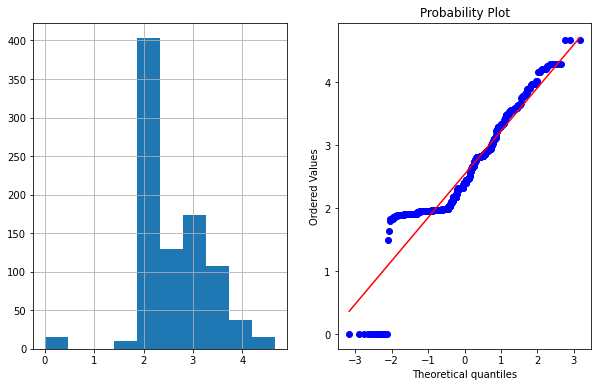

In [39]:
df['Fare_Boxcox'],parameters=stat.boxcox(df['Fare']+1)
plot_data(df, 'Fare_Boxcox')

In [40]:
parameters

-0.09778702818680361

In [41]:
df.head()

,Survived,Age,Fare,Age_log,Fare_log,Age_res,Age_sqrt,Fare_sqrt,Age_exp,Fare_exp,Age_boxcox,Fare_Boxcox
0,0,22.0,7.2500,3.091042,2.110213,0.045455,4.690416,2.692582,13.142729,5.211327,13.468119,1.906724
1,1,38.0,71.2833,3.637586,4.280593,0.026316,6.164414,8.442944,20.724608,35.007129,21.498728,3.497640
2,1,26.0,7.9250,3.258097,2.188856,0.038462,5.099020,2.815138,15.105825,5.612625,15.563417,1.970459
3,1,35.0,53.1000,3.555348,3.990834,0.028571,5.916080,7.286975,19.351889,27.389163,20.056110,3.304258
4,0,35.0,8.0500,3.555348,2.202765,0.028571,5.916080,2.837252,19.351889,5.686302,20.056110,1.981680


In [42]:
def plot_hists(df, variable):
    sns.distplot(df[variable], label=variable.lower(), bins=20, color='r')
    plt.legend()
    first, last = variable.upper().split("_")
    plt.xlabel(first+" "+last+" Graph")
    plt.show()

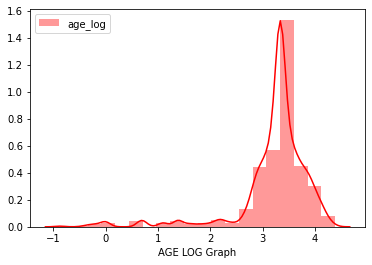

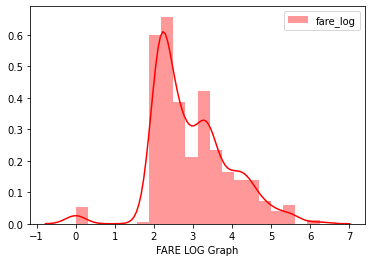

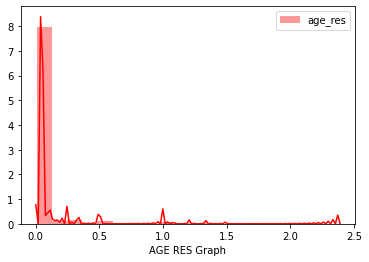

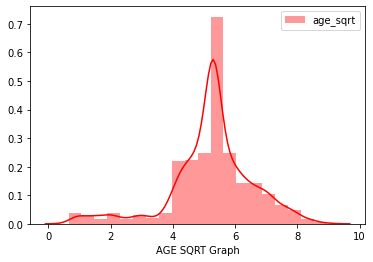

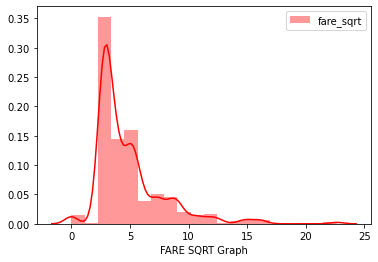

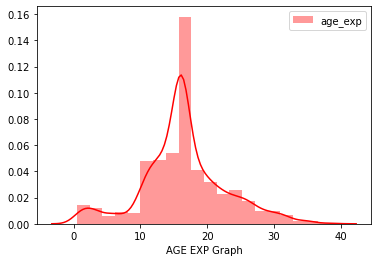

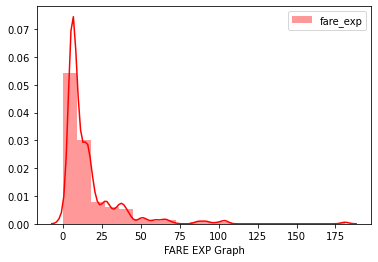

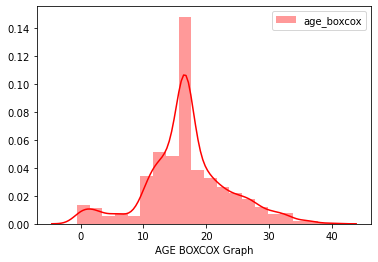

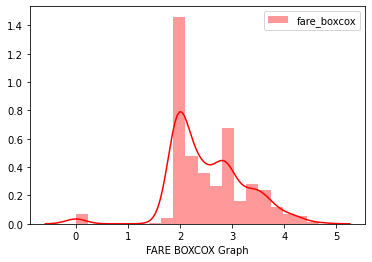

In [43]:
for cols in df.columns[3:]:
    plot_hists(df, cols)